In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd

from Data_loader import*
from numpy import dstack, hstack, array
from pandas import read_csv
from scipy import stats
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input,Permute, Reshape,Dropout,TimeDistributed,Flatten, Conv1D,Conv2D, ReLU, BatchNormalization, MaxPooling1D,MaxPool2D, Concatenate, GRU, GlobalAveragePooling1D, Dense ,LSTM

In [ ]:
x,u,z=dataGenerator(3,13)

User ID:  0


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:14<00:00,  1.09s/it]


shape of input sensor (130000, 3)
shape of touch data (130000, 4)
Shape of labels (130000,)
User ID:  1


100%|██████████| 13/13 [00:17<00:00,  1.32s/it]


shape of input sensor (130000, 3)
shape of touch data (130000, 4)
Shape of labels (130000,)
User ID:  2


100%|██████████| 13/13 [00:12<00:00,  1.05it/s]


shape of input sensor (130000, 3)
shape of touch data (130000, 4)
Shape of labels (130000,)
User ID:  3


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


shape of input sensor (130000, 3)
shape of touch data (130000, 4)
Shape of labels (130000,)


In [20]:
x_train=slice(x, 500, 0)
y_train=split_datasety(z, 500)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.15,shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2,shuffle=True)

In [23]:
input_shape = (500,3)
# Channel 1
input_channel1 = Input(shape=input_shape)
conv1_channel1 = Conv1D(filters = 64,  kernel_size=5,padding = 'same',activation='relu', input_shape=input_shape,kernel_regularizer =tf.keras.regularizers.l2(l2=0.03))(input_channel1)
batch_norm1_channel1 = BatchNormalization()(conv1_channel1)
conv2_channel1 = Conv1D(filters = 128, kernel_size=5, activation='relu',kernel_regularizer =tf.keras.regularizers.l2(l2=0.01))(batch_norm1_channel1)
max_pooling_channel1 = MaxPooling1D(pool_size=2)(conv2_channel1)

# Channel 2
input_channel2 = Input(shape=input_shape)
conv1_channel2 = Conv1D(filters = 64,  kernel_size=5,padding = 'same',activation='relu', input_shape=input_shape,kernel_regularizer =tf.keras.regularizers.l2(l2=0.03))(input_channel2)
batch_norm1_channel2 = BatchNormalization()(conv1_channel2)
conv2_channel2 = Conv1D(filters = 128, kernel_size=5, activation='relu',kernel_regularizer =tf.keras.regularizers.l2(l2=0.03))(batch_norm1_channel2)
max_pooling_channel2 = MaxPooling1D(pool_size=2)(conv2_channel2)

# Channel 3
input_channel3 = Input(shape=input_shape)
conv1_channel3 = Conv1D(filters = 64,  kernel_size=7,padding = 'same',activation='relu', input_shape=input_shape,kernel_regularizer =tf.keras.regularizers.l2(l2=0.03))(input_channel3)
batch_norm1_channel3 = BatchNormalization()(conv1_channel3)
conv2_channel3 = Conv1D(filters = 128, kernel_size=7, activation='relu',kernel_regularizer =tf.keras.regularizers.l2(l2=0.03))(batch_norm1_channel3)
max_pooling_channel3 = MaxPooling1D(pool_size=2)(conv2_channel3)

concatenated_features = Concatenate(axis=1)([max_pooling_channel1])

# GRU layer
gru = GRU(80, return_sequences=True,dropout=0.2)(concatenated_features)
gru1 = GRU(40, return_sequences=True,dropout=0.2)(gru)

# Global Average Pooling
gap = GlobalAveragePooling1D()(gru1)

# Batch Normalization
batch_norm2 = BatchNormalization()(gap)

# Batch Normalization

output = Dense(4,activation='softmax')(batch_norm2)

# Create the model
model = Model(inputs=[(input_channel1)], outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500, 3)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 64)           1024      
                                                                 
 batch_normalization_4 (Batc  (None, 500, 64)          256       
 hNormalization)                                                 
                                                                 
 conv1d_7 (Conv1D)           (None, 496, 128)          41088     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 248, 128)         0         
 1D)                                                             
                                                                 
 concatenate_1 (Concatenate)  (None, 248, 128)         0   

In [ ]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
cp = ModelCheckpoint("C:/Users/Workplace/hmog/Data_1/saved_model/best_checkpoint.hdf5", monitor = 'val_accuracy', save_best_only = True, verbose = 1)

h=model.fit([X_train],Y_train,validation_data =([X_valid],Y_valid) , epochs=50, callbacks = [cp], workers = 32)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 1.6960 - accuracy: 0.7511
Epoch 1: val_accuracy improved from -inf to 0.58757, saving model to C:/Users/Nouveau dossier (2)/hmog/Data_1/saved_model\best_checkpoint22.hdf5
23/23 [==============================] - 25s 559ms/step - loss: 1.6960 - accuracy: 0.7511 - val_loss: 2.1391 - val_accuracy: 0.5876
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 1.3512 - accuracy: 0.8529
Epoch 2: val_accuracy improved from 0.58757 to 0.66102, saving model to C:/Users/Nouveau dossier (2)/hmog/Data_1/saved_model\best_checkpoint22.hdf5
23/23 [==============================] - 10s 417ms/step - loss: 1.3512 - accuracy: 0.8529 - val_loss: 1.9833 - val_accuracy: 0.6610
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 1.2544 - accuracy: 0.8416
Epoch 3: val_accuracy did not improve from 0.66102
23/23 [==============================] - 9s 407ms/step - loss: 1.2544 - accuracy: 0.8416 - val_loss: 1.8434 - 

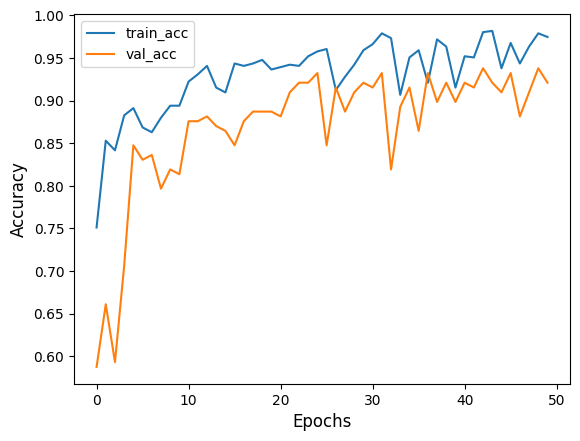

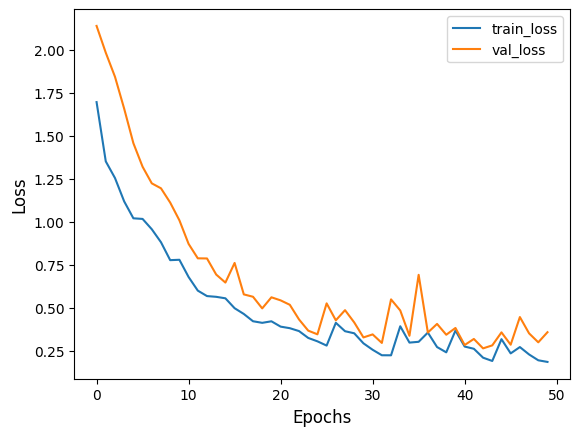

In [25]:

plt.plot(h.history["accuracy"], label = "train_acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.show()
plt.plot(h.history["loss"], label = "train_loss")
plt.plot(h.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs", fontsize = 12)
plt.ylabel("Loss", fontsize = 12)
plt.legend()

plt.show()

In [27]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 2s 83ms/step - loss: 0.3477 - accuracy: 0.9295


[0.3477322459220886, 0.9294871687889099]

In [37]:
l=155
print("ground truth is :", Y_test[l])
yhat = model.predict(X_test)
print("predicted persson is :", yhat[l])

ground truth is : [[3.]]
5/5 [==============================] - 0s 78ms/step
predicted persson is : [7.4901429e-05 1.2674605e-04 1.9332876e-06 9.9979645e-01]
